<a href="https://colab.research.google.com/github/4elvis/Descriptive-Statistics-Project/blob/main/Hypothesis_Testing_Elvis_N%2C_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**



Autolib was an electric car sharing company in Europe with its headquarters in Paris. Car sharing services enable individuals with driver’s license to hire cars over short periods of time making it an economically viable business. Electric cars are also environmental friendly making them easy to maintain while in use. The car sharing company was an extension of the previous bike sharing services. At its peak, Autolib had over 129,000 subscribers and over 1000 electric stations across Paris. However, variations between the number of Bluecars taken and the Bluecars returned have forced the company to seek a data scientists help. The business will not change its business strategy if the average number of Bluecars taken is greater than the number of bluecars returned during weekdays. A sample must therefore be picked randomly to test the hypothesis.


*Null Hypothesis:*
The management of Autolib will not change its business strategy if the average number of Bluecars taken during a certain period 7 days is greater than the number of Bluecars returned during the same period. 

*Alternative Hypothesis*:
The average number of Bluecars taken is lower than the number of Bluecars returned during 7 days. Management will therefore be forced to change their business model and strategize on reversing the same.
Metrics of Success



1. Loading and Reading the Datasets




In [3]:
#importing the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importing the data set:/content/autolib_daily_events_postal_code.csv
Autolib = pd.read_csv('autolib_daily_events_postal_code.csv')
Autolib

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [5]:
#preview of the dataset
Autolib.head(6)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35


In [6]:
#preview of the dataset 
Autolib.tail(6)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [7]:
## Determining the no. of records in our dataset
print('This dataset has ' + str(Autolib.shape[0]) + ' rows, and ' + str(Autolib.shape[1]) + ' columns')


This dataset has 16085 rows, and 13 columns


In [8]:
#checking whether each column has the appropriate data type
dataTypeSeries=Autolib.dtypes
print('Data type of each column of Dataframe')
print(dataTypeSeries)

Data type of each column of Dataframe
Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object


In [9]:
#Describing the dataset
Autolib.describe()


,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


2**.Data Cleaning**

In [10]:
#Checking for unique values in the dataset
Autolib.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [11]:
#Checking for unique values in specific columns
Autolib['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [12]:
Autolib['n_daily_data_points'].unique()

array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

In [13]:
Autolib['dayOfWeek'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [14]:
Autolib['BlueCars_taken_sum'].unique()

array([ 110,   98,  138,  104,  114,  187,  180,   84,   81,   88,  125,
        126,  224,  193,  107,  116,  118,  122,  130,  217,  143,  123,
        112,  108,  145,  216,  190,   83,  103,  146,  199,  186,  121,
        113,  109,  207,  160,  115,   94,   99,  119,  176,  157,   85,
        100,  135,    8,   92,  127,  136,  192,  168,  102,  134,  197,
        173,  131,  196,  150,  156,  231,  105,  219,  179,  124,  188,
        139,   97,  120,  159,  147,  151,  129,  152,  142,  141,  202,
        175,   96,  133,  254,  137,  185,  203,    6,  166,  165,  243,
        264,  213,  164,  163,  191,  276,  210,  183,  148,  270,  128,
        280,  178,  153,  158,  259,  161,  240,   12,  181,  140,  263,
        167,  177,  250,  208,  171,  266,  155,  247,  154,  184,  293,
        228,  182,  144,  218,  162,  239,  200,  170,  174,  172,  245,
          5,  195,  237,  331,  283,  212,  211,  380,  356,  233,  220,
        238,  384,  313,  229,  221,  201,  350,  3

In [15]:
Autolib['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

In [16]:
Autolib['BlueCars_returned_sum'].unique()

array([ 103,   94,  139,  104,  117,  185,  180,   83,   84,   85,  125,
        127,  223,  193,  107,  116,  118,  122,  130,  217,  150,  113,
        146,  218,  189,   81,  110,  147,  204,  121,   99,  112,  109,
        207,  165,  111,   93,  119,  176,  158,   86,   98,  135,    9,
         91,  131,  137,  138,  208,  177,  124,  101,  145,  203,  169,
         96,  136,  142,  196,  154,  100,   97,  144,  128,  179,  151,
        115,  232,  105,  219,  143,  190,  102,  159,  155,  156,  120,
        141,  201,  133,  253,  199,   95,  108,  188,  126,  206,  174,
          7,  244,  197,  153,  264,  148,  164,  277,  213,  149,  175,
        270,  198,  280,  161,  178,  152,  160,  257,  205,  240,  123,
        157,   12,  265,  186,  173,  140,  171,  167,  255,  209,  170,
        266,  248,  243,  183,  292,  222,  134,  236,  132,  181,  172,
        184,  168,  162,  237,  163,  233,  202,  283,  192,  252,  211,
          6,  250,  187,  229,  249,  338,  293,  2

In [17]:
Autolib['Utilib_taken_sum'].unique()

array([ 3,  1,  0,  2,  6,  5,  4,  7,  8,  9, 11, 17, 10, 13, 18, 12, 15,
       16, 21, 19, 14, 34, 31, 23, 20, 22, 24, 29, 25, 28, 26, 27, 46, 32,
       30, 43, 38, 37, 40, 45, 54, 36, 35, 39, 42, 33, 41, 47])

In [18]:
Autolib['Utilib_returned_sum'].unique()

array([ 2,  1,  0,  3,  6,  5,  4,  7,  8,  9, 11, 17, 10, 13, 18, 14, 15,
       12, 21, 20, 16, 19, 35, 32, 23, 22, 24, 25, 27, 26, 30, 49, 28, 31,
       29, 43, 38, 39, 36, 34, 47, 45, 33, 58, 41, 37, 42, 40, 44])

In [19]:
#findning the duplicates
duplicate = Autolib[Autolib.duplicated(keep = 'last')]
  
print("Duplicate Rows :")

Duplicate Rows :


In [20]:
#Dropping the duplicates
Autolib.drop_duplicates()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [21]:
#Counting number of Bluecars on the taken each column 
column_name = "BlueCars_taken_sum"
column_sum = Autolib[column_name].sum()



print(column_sum)
#A total of 2025535 cars were taken 
#no of goals on the returned column
column_name = "BlueCars_returned_sum"
column_sum = Autolib[column_name].sum()



print(column_sum)
#A total of 2025306 cars were taken

2025535
2025306


In [22]:
#Checking for missing values, the missing values will then be droped.
Autolib.dropna (inplace =True)

In [23]:
# We then countercheck if the missing values have been dropped to avoid errors

Autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [24]:
# An elimantion of missing values forces us to re-align the new data

Autolib.columns = Autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
Autolib.head(5)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


2.i) *Checking for Outliers*

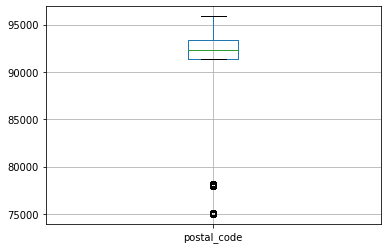

In [25]:
#We check for Outliers on different columns
#Checking for outliers
#Checking for postal codes
Autolib.boxplot(["postal_code"])

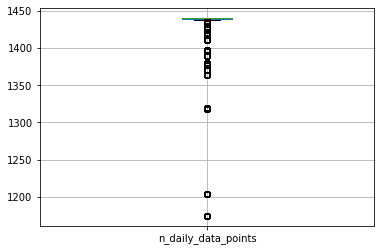

In [26]:
#Checking for n daily data points
Autolib.boxplot(["n_daily_data_points"])

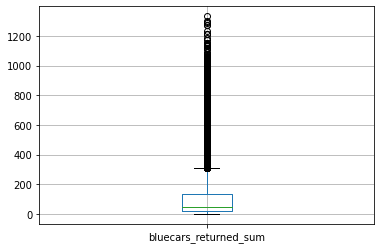

In [27]:
#Checking for bluecars returrned sum
Autolib.boxplot(["bluecars_returned_sum"])

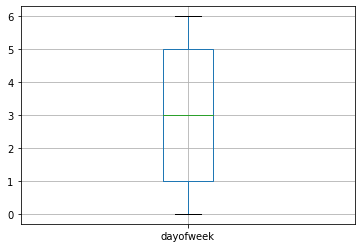

In [28]:
#Checking for n daily data points
Autolib.boxplot(["dayofweek"])

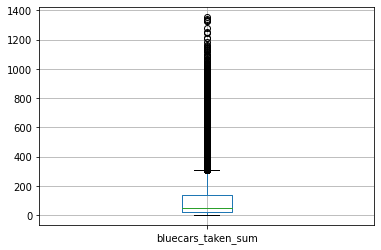

In [29]:
#Checking for bluecars taken sum
Autolib.boxplot(["bluecars_taken_sum"])

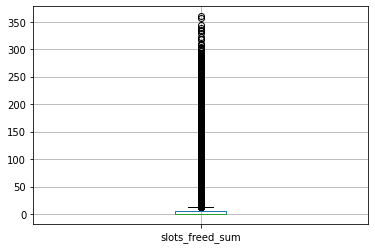

In [30]:
#Checking for slots freed sum
Autolib.boxplot(["slots_freed_sum"])

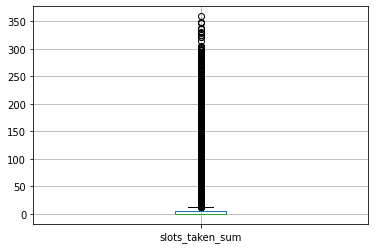

In [31]:
#Checking for n daily data points
Autolib.boxplot(["slots_taken_sum"])

In [32]:
#Removing the Outliers
#Removing the outliers from the above columns
Q1 = Autolib.quantile(0.25)
Q3 = Autolib.quantile(0.75)
IQR = Q3 - Q1
Autolib_out = Autolib[~((Autolib < (Q1 - 1.5 * IQR)) | (Autolib > (Q3 + 1.5 * IQR))).any(axis=1)]
print(Autolib)
print(Autolib_out)

       postal_code       date  ...  slots_freed_sum  slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
...            ...        ...  ...              ...              ...
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0
16084        95880  6/19/2018  ...                0                0

[16085 rows x 13 columns]
       postal_code       date  ...  slots_freed_sum  slots_taken_sum
3899         91330   1/1/2018  ...                4                2
3900   

The Outliers have been removed as the number of rows has reduced from 16085 to 9783 rows.

3. **EXPLORATORY DATA ANALYSIS**


3.1 ***Univariate Analysis***

In [33]:
#Converting the day type column values to numerical values
#
Autolib["day_type"] = np.where(Autolib["day_type"].str.contains("weekday", "weekend"), 1, 0)
Autolib.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,1,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,1,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,1,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,1,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,1,114,117,3,3,6,6,18,20


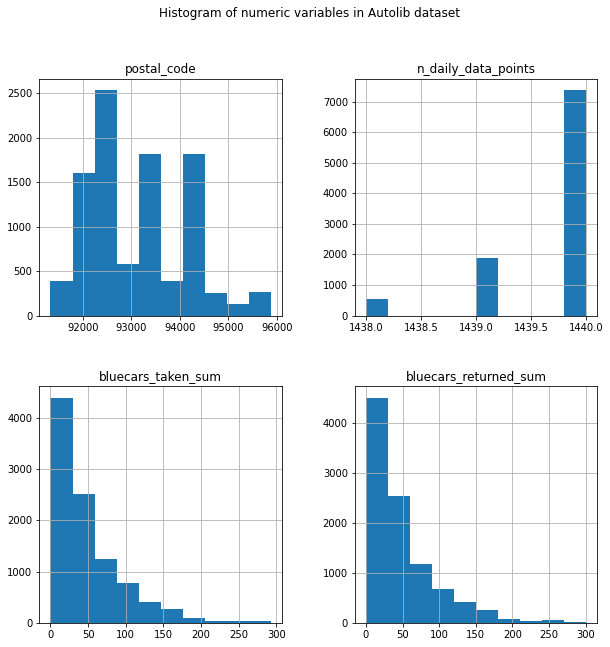

In [34]:
#Plotting a histogram representation of some numeric columns 
Autolib_out.drop(['dayofweek','utilib_taken_sum','utilib_returned_sum','utilib_14_taken_sum',	'utilib_14_returned_sum',	'slots_freed_sum','slots_taken_sum'] ,axis=1).hist(bins=10, figsize=(10,10))
plt.suptitle("Histogram of numeric variables in Autolib dataset")
plt.savefig('Autolib analyisis Histogram')
plt.show()


The above histograms define the relationship of the data:Postal Code data-their is a huge variation in its data, N data points column- the data is skewed to the left, Day type- their is a huge variation in the data, Bluecars returned and taken data- both histograms have data skewed to the right. The number of Bluecars returned is higher than the number of bluecars taken.

In [35]:
#Plotting the Kurtosis of the Bluecar taken and returned data
Autolib_out["bluecars_taken_sum"].kurt()
print(Autolib_out["bluecars_taken_sum"].kurt())
#The data has a positive kurtosis. 

3.9107948136076676


In [36]:
#Plotting the Kurtosis of the Bluecar taken data 
Autolib_out["bluecars_returned_sum"].kurt()
print(Autolib_out["bluecars_returned_sum"].kurt())
#The data has a positive kurtosis. 

3.9188404736411444


The kurtosis of the Bluecars returned and taken is positive >3, indicating signs of thickened tails

In [37]:
#looking at the dataset statistics
Autolib_out[['postal_code','n_daily_data_points','dayofweek','bluecars_taken_sum', 'bluecars_returned_sum',]].describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum
count,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000
mean,93104.755188,1439.698457,2.979454,49.242870,49.222324
std,1012.235885,0.564981,2.074932,46.303795,46.223838
min,91330.000000,1438.000000,0.000000,0.000000,0.000000
25%,92270.000000,1440.000000,1.000000,17.000000,17.000000
50%,93110.000000,1440.000000,3.000000,34.000000,34.000000
75%,94100.000000,1440.000000,5.000000,67.000000,67.000000
max,95880.000000,1440.000000,6.000000,293.000000,301.000000


In [38]:
#looking at the dataset statistics with outliers
Autolib[['postal_code','n_daily_data_points','dayofweek','bluecars_taken_sum', 'bluecars_returned_sum',]].describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714
std,7647.342000,33.212050,2.008378,185.426579,185.501535
min,75001.000000,1174.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000


The disparities in the mean clearly define the effects of the outliers. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


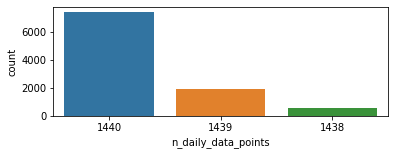

In [39]:
#Data point summaries
plt.figure(figsize=(6, 2))
sns.countplot(Autolib_out.n_daily_data_points.dropna(), order = Autolib_out.n_daily_data_points.value_counts().index);
#As seen by the bars, the number of data points reduces as the number of daily data points reduces.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


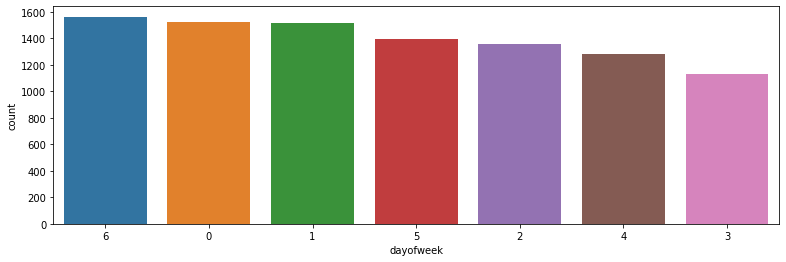

In [40]:
#dayofweek	status summaries
plt.figure(figsize=(13, 4))
sns.countplot(Autolib_out.dayofweek.dropna(), order = Autolib_out.dayofweek	.value_counts().index);
#Count has reduced with the days of the week changing, day 3 has the lowest.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


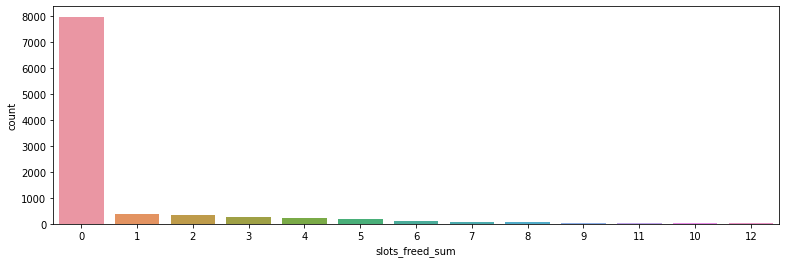

In [41]:
#slots_freed_sum summaries
plt.figure(figsize=(13, 4))
sns.countplot(Autolib_out.slots_freed_sum.dropna(), order = Autolib_out.slots_freed_sum.value_counts().index);
#As seen by the blue bar, most of the respondents were married and living together with their spouses.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


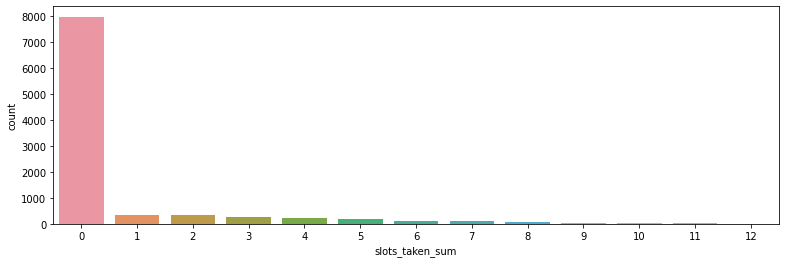

In [42]:
#Slots_taken_sum summaries.
plt.figure(figsize=(13, 4))
sns.countplot(Autolib_out.slots_taken_sum.dropna(), order = Autolib_out.slots_taken_sum.value_counts().index);
#The number of slots taken is fairly high.

In [43]:
#Frequency of the Bluecar categories
data = pd.crosstab(index=Autolib_out['bluecars_taken_sum'], columns=['bluecars_returned_sum'])
data/data.sum()

col_0,bluecars_returned_sum
bluecars_taken_sum,
0,0.003680
1,0.008586
2,0.010631
3,0.013391
4,0.012368
...,...
287,0.000102
290,0.000102
291,0.000102


***Recommendations***

The number of Bluecars returned is higher than the number of Bluecars taken suggesting a loss in revenue. The company should investigate why.

3.2 ***Bivarite Analysis***

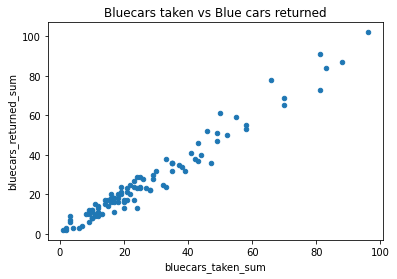

In [44]:
#Bluecars taken vs Bluecars returned
Autolib_out[Autolib_out['bluecars_taken_sum'] < 100].sample(100).plot.scatter(x='bluecars_taken_sum', y='bluecars_returned_sum')
plt.title('Bluecars taken vs Blue cars returned')
plt.show()
#The data is more concentrated on the lower left side of the scatter plot. Some scattered points may be seen at the far corener.It shows the data has minimum variations

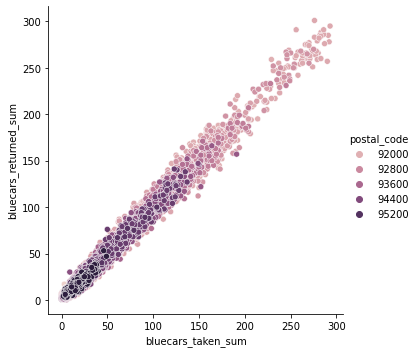

In [45]:
# Plotting relational plots between the Bluecars taken and bluecars returned
sns.relplot( x = 'bluecars_taken_sum', y = 'bluecars_returned_sum', hue = 'postal_code',data= Autolib_out)
#The distribution of Bluecars across various postal codes seems to be concentrated in the 95200-93600 area codes.

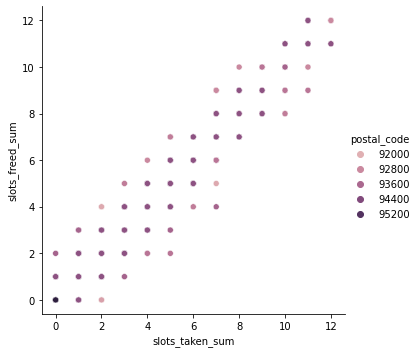

In [46]:
# Plotting relational plots between slots freed with postal codes
sns.relplot( x = 'slots_taken_sum', y = 'slots_freed_sum', hue = 'postal_code',data= Autolib_out)
#The distribution of slots taken or freed across various postal codes seems to be concentrated in the 95200-93600 area codes.

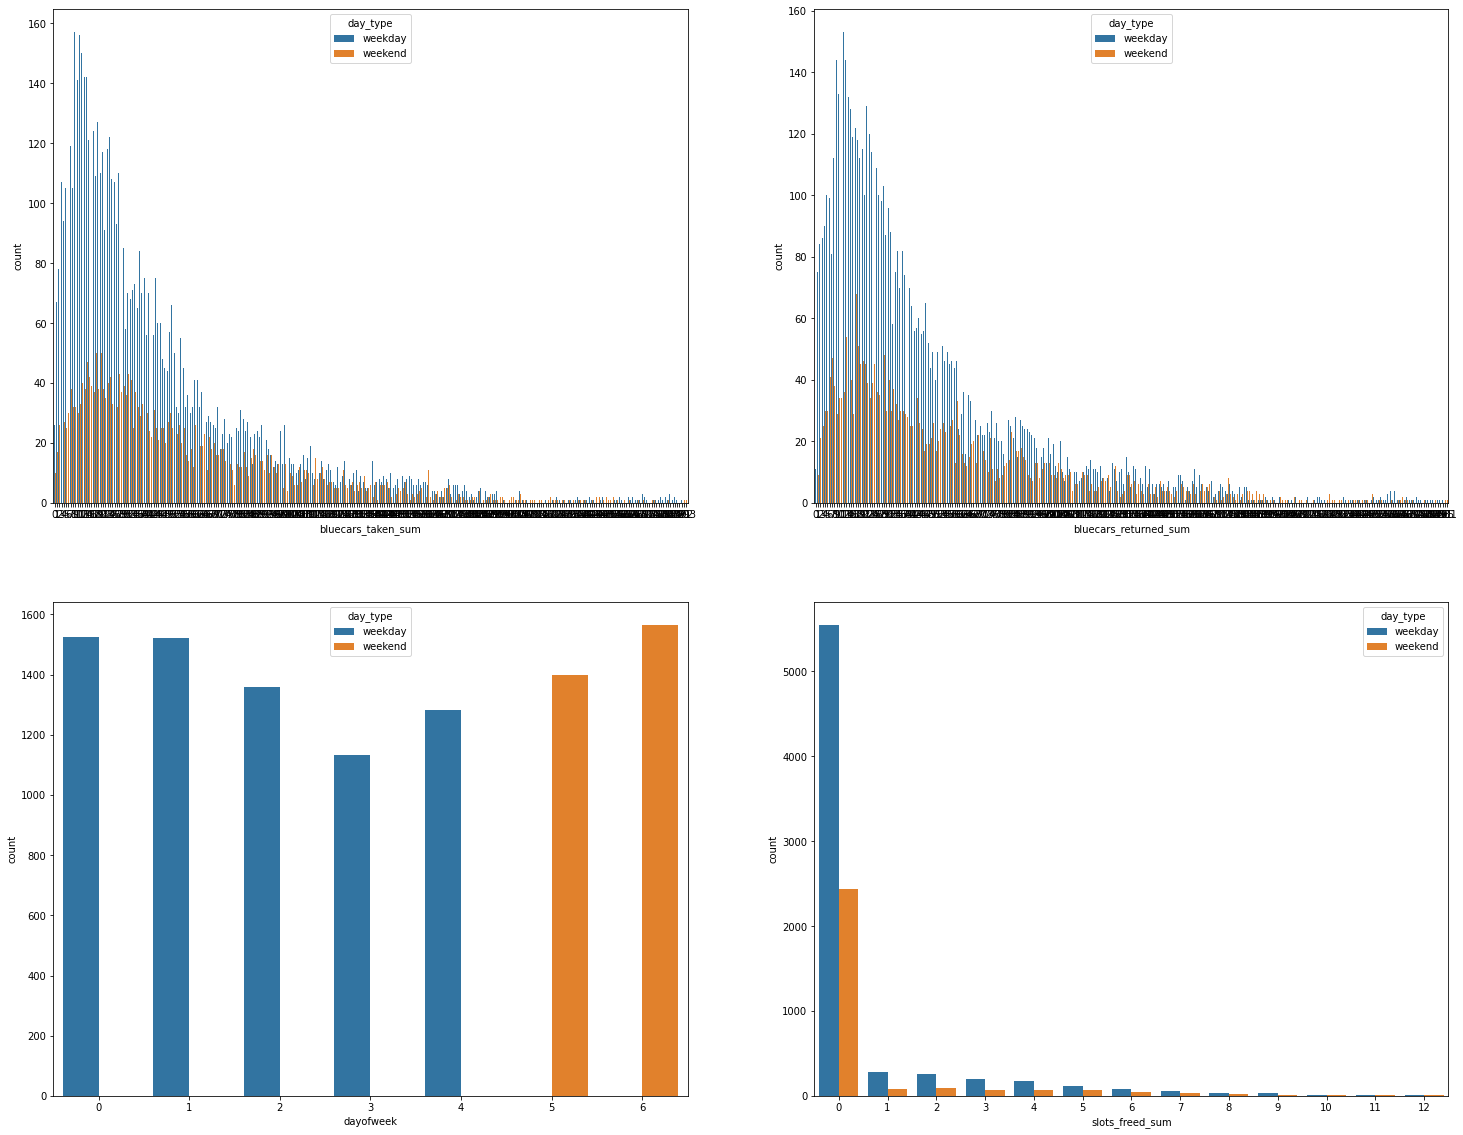

In [47]:
#Plotting a relationship between days of the week with bluecars taken, bluecars returned, postal codes, slots freed
fig,axes = plt.subplots(2,2, figsize=(25,20))
sns.countplot(x='bluecars_taken_sum',hue='day_type',data=Autolib_out,ax=axes[0,0])
sns.countplot(x='bluecars_returned_sum',hue='day_type',data=Autolib_out,ax=axes[0,1])
sns.countplot(x='dayofweek',hue='day_type',data=Autolib_out,ax=axes[1,0])
sns.countplot(x='slots_freed_sum',hue='day_type',data=Autolib_out,ax=axes[1,1])

From the data above, Autolib relies mostly on revenues raised from business hours during the weekdays.

In [48]:
# Checking how our varibales are corelated using a matrix
corrMatrix = Autolib_out.corr()
corrMatrix

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postal_code,1.000000,0.001195,0.004671,-0.206847,-0.208021,-0.132142,-0.129783,-0.150472,-0.149341,-0.121932,-0.120596
n_daily_data_points,0.001195,1.000000,0.098400,0.003433,0.005715,0.010958,0.010642,0.011844,0.016537,-0.001043,-0.002158
dayofweek,0.004671,0.098400,1.000000,0.110733,0.103159,0.075870,0.077932,0.086363,0.083896,0.020186,0.014675
bluecars_taken_sum,-0.206847,0.003433,0.110733,1.000000,0.992041,0.626960,0.625355,0.751659,0.747126,0.312955,0.310257
bluecars_returned_sum,-0.208021,0.005715,0.103159,0.992041,1.000000,0.629297,0.627041,0.754341,0.750467,0.309676,0.309799
utilib_taken_sum,-0.132142,0.010958,0.075870,0.626960,0.629297,1.000000,0.896131,0.505760,0.497382,0.204125,0.203032
utilib_returned_sum,-0.129783,0.010642,0.077932,0.625355,0.627041,0.896131,1.000000,0.508498,0.500723,0.202881,0.202152
utilib_14_taken_sum,-0.150472,0.011844,0.086363,0.751659,0.754341,0.505760,0.508498,1.000000,0.948078,0.220987,0.219591
utilib_14_returned_sum,-0.149341,0.016537,0.083896,0.747126,0.750467,0.497382,0.500723,0.948078,1.000000,0.216981,0.218259
slots_freed_sum,-0.121932,-0.001043,0.020186,0.312955,0.309676,0.204125,0.202881,0.220987,0.216981,1.000000,0.985033


A negative correlation between postal codes and bluecars taken suggest that the company should balance the number of electric cars proportionally with an increase in areas of coverage.

**Recemendations**

The number of cars during the weekdays is high on the first day of the week.The company should conduct investigations on why the number is lower on other days such as day 3.

The number of Bluecars returned is also higher than the number of Bluecars returned suggesting the need to investigate the loss of revenue.

4. **Sampling Process**

1. Stratified Sampling Process

In [49]:
#We drop the unwanted data first
#Dropping unwanted columns
#Dropping unwanted columns 
Autolib_out.drop(['utilib_taken_sum','utilib_returned_sum','utilib_14_taken_sum','utilib_14_returned_sum'], axis='columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
Autolib_out.head(6)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
3899,91330,1/1/2018,1440,0,weekday,19,9,4,2
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0
3901,91330,1/3/2018,1439,2,weekday,11,13,1,1
3903,91330,1/5/2018,1440,4,weekday,10,6,1,1
3905,91330,1/7/2018,1440,6,weekend,28,17,4,2
3906,91330,1/8/2018,1438,0,weekday,3,1,0,1


In [51]:
#Dividing the data into two groups
Autolibs = Autolib_out.groupby('day_type')
Autolibs.head(4)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
3899,91330,1/1/2018,1440,0,weekday,19,9,4,2
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0
3901,91330,1/3/2018,1439,2,weekday,11,13,1,1
3903,91330,1/5/2018,1440,4,weekday,10,6,1,1
3905,91330,1/7/2018,1440,6,weekend,28,17,4,2
3911,91330,1/13/2018,1440,5,weekend,24,21,2,2
3912,91330,1/14/2018,1440,6,weekend,27,30,0,0
3918,91330,1/20/2018,1439,5,weekend,16,10,1,1


In [52]:
#Converting the day type column values to numerical values
#
Autolib_out["day_type"] = np.where(Autolib_out["day_type"].str.contains("weekday", "weekend"), 1, 0)
Autolib_out.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
3899,91330,1/1/2018,1440,0,1,19,9,4,2
3900,91330,1/2/2018,1438,1,1,10,10,0,0
3901,91330,1/3/2018,1439,2,1,11,13,1,1
3903,91330,1/5/2018,1440,4,1,10,6,1,1
3905,91330,1/7/2018,1440,6,0,28,17,4,2


4.2 Simple Random Sampling Technique

In [53]:
# checking count of the data
Autolib_out['bluecars_taken_sum'].value_counts()

12     190
9      189
14     189
11     189
13     180
      ... 
267      1
275      1
291      1
216      1
287      1
Name: bluecars_taken_sum, Length: 275, dtype: int64

In [54]:
# checking count of the data
Autolib_out['bluecars_returned_sum'].value_counts()

13     198
17     190
12     189
11     182
14     176
      ... 
249      1
209      1
193      1
198      1
295      1
Name: bluecars_returned_sum, Length: 269, dtype: int64

In [55]:
# Non stratified sample
non_strat_output = Autolib_out.sample(frac=0.7) 
print(non_strat_output['bluecars_taken_sum'].value_counts())

12     141
9      134
14     130
11     129
17     127
      ... 
292      1
280      1
264      1
260      1
291      1
Name: bluecars_taken_sum, Length: 255, dtype: int64


In [56]:
# Stratified sample
strat_output = Autolib_out.groupby('bluecars_taken_sum', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.4))

# proportion of the non_stratified sample
print(strat_output['bluecars_taken_sum'].value_counts())

9      76
11     76
12     76
14     76
13     72
       ..
246     1
248     1
254     1
256     1
268     1
Name: bluecars_taken_sum, Length: 232, dtype: int64


In [57]:
# Check the stratified output
print(strat_output)

       postal_code       date  ...  slots_freed_sum  slots_taken_sum
11981        93390   2/1/2018  ...                0                0
13186        94100   3/8/2018  ...                0                0
8262         92360   1/7/2018  ...                0                0
11876        93370  3/19/2018  ...                0                0
12275        93440   4/1/2018  ...                0                0
...            ...        ...  ...              ...              ...
5057         92130  3/13/2018  ...                9                9
5003         92130  1/15/2018  ...               11               11
5036         92130  2/17/2018  ...                5                5
5108         92130   5/3/2018  ...                2                2
5079         92130   4/4/2018  ...                5                6

[3900 rows x 9 columns]


From the total dataset, a sample containing 40% of the whole data(3900 rows) has been used and subjected to stratified sampling

In [58]:
# Determining the size
print(Autolib_out.shape)

(9783, 9)


In [59]:
#Conducting a simple random test
# Selecting the sample 
Autolib_out_sample = Autolib_out.sample(n =6800, replace="False")
print(Autolib_out)

       postal_code       date  ...  slots_freed_sum  slots_taken_sum
3899         91330   1/1/2018  ...                4                2
3900         91330   1/2/2018  ...                0                0
3901         91330   1/3/2018  ...                1                1
3903         91330   1/5/2018  ...                1                1
3905         91330   1/7/2018  ...                4                2
...            ...        ...  ...              ...              ...
16079        95880  6/14/2018  ...                0                0
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0

[9783 rows x 9 columns]


5. **Conducting the Nomalcy Test **

***Shapiro-Wilk Test***

In [60]:
# Importing functions from numpy
from numpy.random import seed
from numpy.random import randn
# Importing matplotlib
from matplotlib import pyplot

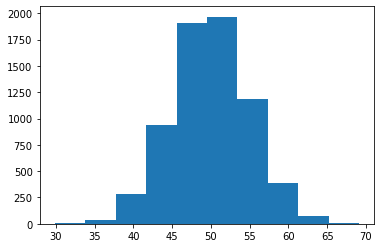

In [61]:
#We first plot a histogram 
#generate univariate observations
Autolib_out = 5 * randn(6800) + 50
# plot the histogram data
pyplot.hist(Autolib_out)
pyplot.show()
#it has a Guassian shape.

In [62]:
# imporing the shapiro function
from scipy.stats import shapiro 

In [63]:
# generating univariate observations
Autolib_out= 5 * randn(6800) + 50

# testing for normality
stat, p = shapiro(Autolib_out)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
  

Statistics=1.000, p=0.792
Sample looks Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The data can then be used to test the Hypothesis

6. **HYPOTHESIS TESTING**

In [64]:
#Calculating the sample mean
Autolib_out_sample.mean()

postal_code              93101.523529
n_daily_data_points       1439.705882
dayofweek                    2.992647
day_type                     0.689706
bluecars_taken_sum          48.788824
bluecars_returned_sum       48.715294
slots_freed_sum              0.693088
slots_taken_sum              0.688824
dtype: float64

It is important to note that a sample population of 6800 has been chosen to test the hypothesis

Null Hypothesis: The company seeks to investigate whether the average number of Bluecars is greater than the current mean of Bluecars returned. If so, the company will not change its business model. 

Altrnative Hypothesis:The average number of Bluecars is less than the current Bluecars returned mean and therefore the company(Autolib) has to change their business model

In [65]:
#looking at the dataset statistics with outliers
Autolib_out_sample[['postal_code','n_daily_data_points','dayofweek','bluecars_taken_sum', 'bluecars_returned_sum',]].describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum
count,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000
mean,93101.523529,1439.705882,2.992647,48.788824,48.715294
std,1015.266524,0.551744,2.086863,44.962776,44.892024
min,91330.000000,1438.000000,0.000000,0.000000,0.000000
25%,92270.000000,1440.000000,1.000000,17.000000,17.000000
50%,93100.000000,1440.000000,3.000000,34.000000,34.000000
75%,94100.000000,1440.000000,5.000000,66.000000,66.000000
max,95880.000000,1440.000000,6.000000,292.000000,301.000000


In [66]:
#importing the libraries we need
import math
from math import sqrt

In [67]:
# n=6800, mean of Bluecars returned= 49.22, std=46.217, alpha= 0.05 sample mean=49.04
#H0
mean = 49.22
#mean sample
mu = 49.04
#standard deviation
std = 46.217
#significance level
alpha = 0.05
#zscore
zscore = ( mu - mean ) / std
# calculate the p-value
from scipy.stats import norm
p = norm.cdf(zscore)
print(p)

0.4984462550807611


In [68]:
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Accept null hypothesis that the means are equal.


The value of the p-value is therefore greater than the level of significance(0.05) and hence we fail to reject the null hypothesis. This also means that the current business model works

6.1 Point Estimate

In [69]:
#we import the libraries we are to use
import scipy.stats as stats
import random

In [70]:
#we use the seed value of 10
np.random.seed(10)

In [71]:
Autolib_out_sample.head(5)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
15480,94800,1/20/2018,1439,5,0,113,114,0,0
7450,92300,5/5/2018,1440,5,0,182,188,0,0
15032,94450,2/9/2018,1439,4,1,20,19,0,0
13284,94110,1/7/2018,1440,6,0,38,44,0,0
9789,92700,5/29/2018,1439,1,1,112,121,0,0


In [72]:
#we generate the random variables for the population using the initial Autolib_out_sample dataset
Autolib_out_sample= stats.norm.rvs(loc=6, scale=1, size=6850)
print(Autolib_out_sample)

[7.3315865  6.71527897 4.45459971 ... 4.17703941 4.73648516 7.06942052]


In [73]:
np.random.seed(6)
# Sample 6000 values
Autolib_out_samples = np.random.choice(a= Autolib_out_sample,
                               size=6000)            

# Show sample mean
print (Autolib_out_samples.mean() )                         

# calculate how much the estimated mean differs from the main mean
Autolib_out_sample.mean() - Autolib_out_samples.mean()

5.993687739657689


-0.010096659961108756

From a population sample of 6000, the estimator underestimates the true mean with 0.0100. The estimate can therefore yield accurate results

6. 2  Constructing the Confidence Interval

In [74]:
Autolib_out_sample.mean()

5.9835910796965806

In [75]:
#sample mean for the Bluecars taken=42.042
#Finding the sample size
sample_size = Autolib_out_sample.shape[0]
sample_size

6850

In [76]:
# Finding the standard error of the mean of data 
#
std_error = Autolib_out_sample.std() / np.sqrt(sample_size)
std_error

0.011918803663050169

The confidence level to be used below is 95%

In [77]:
stats.norm.interval(0.95, loc=Autolib_out_sample, scale=std_error)

(array([7.30822608, 6.69191855, 4.43123928, ..., 4.15367898, 4.71312473,
        7.0460601 ]),
 array([7.35494693, 6.7386394 , 4.47796013, ..., 4.20039984, 4.75984559,
        7.09278095]))